# Farmers' Market and Income Geographic Comparison
Author: Stacey Beck

This is a comparison of households across Santa Clara County in California block areas
using:
- income
- geographic location
- farmers market location

* may want to consider using households with SNAP benefits if available from census


In [295]:
# Import packages for visualizing spatial data
!pip install contextily geopandas mapclassify
import geopandas as gpd
import pandas as pd
import seaborn as sns
import contextily as ctx
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [17]:
# Get the data for census income
!ls data

acs2020_5yr_B19001_14000US06085511302.geojson
fips.png
metadata.json


In [358]:
income_geo_df = gpd.read_file('data/acs2020_5yr_B19001_14000US06085511302.geojson')
income_geo_df.head()

geoid                                name  B19001001  \
0        05000US06085              Santa Clara County, CA   635314.0   
1  14000US06085500100  Census Tract 5001, Santa Clara, CA     2689.0   
2  14000US06085500200  Census Tract 5002, Santa Clara, CA     1968.0   
3  14000US06085500300  Census Tract 5003, Santa Clara, CA     1540.0   
4  14000US06085500400  Census Tract 5004, Santa Clara, CA     1049.0   

   B19001001, Error  B19001002  B19001002, Error  B19001003  B19001003, Error  \
0            1803.0    18079.0            1038.0    14662.0             869.0   
1             350.0       85.0              70.0      150.0             114.0   
2             252.0       57.0              58.0       14.0              21.0   
3             185.0       33.0              27.0        0.0              13.0   
4             113.0       27.0              19.0        5.0               8.0   

   B19001004  B19001004, Error  ...  B19001013, Error  B19001014  \
0    13056.0             881.0  ...            2002.0    58589.0   
1       75.0              61.0  ...             131.0      183.0   
2       11.0              20.0  ...             163.0      167.0   
3       13.0              24.0  ...             153.0      136.0   
4       40.0              29.0  ...              74.0       72.0   

   B19001014, Error  B19001015  B19001015, Error  B19001016  B19001016, Error  \
0            1853.0    52524.0            1527.0    85980.0            2031.0   
1             120.0      324.0             147.0      376.0             181.0   
2              95.0      284.0             119.0      306.0             116.0   
3              64.0       89.0              49.0      342.0             104.0   
4              41.0       90.0              50.0      113.0              58.0   

   B19001017  B19001017, Error  \
0   192333.0            2782.0   
1      728.0             304.0   
2      546.0             240.0   
3      358.0              98.0   
4      217.0              55.0   

                                            geometry  
0  MULTIPOLYGON (((-122.04412 37.20049, -122.0440...  
1  MULTIPOLYGON (((-121.90463 37.36078, -121.9044...  
2  MULTIPOLYGON (((-121.91125 37.35418, -121.9108...  
3  MULTIPOLYGON (((-121.92189 37.34604, -121.9218...  
4  MULTIPOLYGON (((-121.93034 37.33913, -121.9303...  

[5 rows x 37 columns]

In [359]:
income_geo_df.shape

(1582, 37)

In [21]:
# View data types and if missing values
income_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1582 non-null   object  
 1   name              1582 non-null   object  
 2   B19001001         1582 non-null   float64 
 3   B19001001, Error  1582 non-null   float64 
 4   B19001002         1582 non-null   float64 
 5   B19001002, Error  1582 non-null   float64 
 6   B19001003         1582 non-null   float64 
 7   B19001003, Error  1582 non-null   float64 
 8   B19001004         1582 non-null   float64 
 9   B19001004, Error  1582 non-null   float64 
 10  B19001005         1582 non-null   float64 
 11  B19001005, Error  1582 non-null   float64 
 12  B19001006         1582 non-null   float64 
 13  B19001006, Error  1582 non-null   float64 
 14  B19001007         1582 non-null   float64 
 15  B19001007, Error  1582 non-null   float64 
 16  B19001008       

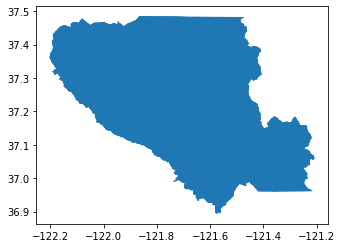

In [24]:
# Quick view of county
income_geo_df.plot()
plt.show()

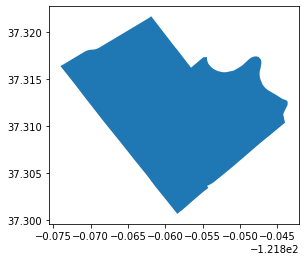

In [25]:
# Random block group
income_geo_df.sample().plot()
plt.show()

## Understanding the FIPS code and block numbers

image source: 
- https://www.youtube.com/watch?v=rrGw6ct-Cbw
- https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

![data/images/fips.png](data/fips.png)

In [26]:
# First 5 geoids
income_geo_df.geoid.head()

0          05000US06085
1    14000US06085500100
2    14000US06085500200
3    14000US06085500300
4    14000US06085500400
Name: geoid, dtype: object

## Cleaning Table for easier use 

- Drop rows and columns that we dont need
- rename the columns for easier understanding

In [360]:
# Delete top row of the data frame (just a summary)
income_geo_df = income_geo_df.drop([0])
income_geo_df.head()

geoid                                name  B19001001  \
1  14000US06085500100  Census Tract 5001, Santa Clara, CA     2689.0   
2  14000US06085500200  Census Tract 5002, Santa Clara, CA     1968.0   
3  14000US06085500300  Census Tract 5003, Santa Clara, CA     1540.0   
4  14000US06085500400  Census Tract 5004, Santa Clara, CA     1049.0   
5  14000US06085500500  Census Tract 5005, Santa Clara, CA     2213.0   

   B19001001, Error  B19001002  B19001002, Error  B19001003  B19001003, Error  \
1             350.0       85.0              70.0      150.0             114.0   
2             252.0       57.0              58.0       14.0              21.0   
3             185.0       33.0              27.0        0.0              13.0   
4             113.0       27.0              19.0        5.0               8.0   
5             282.0       28.0              27.0      153.0              89.0   

   B19001004  B19001004, Error  ...  B19001013, Error  B19001014  \
1       75.0              61.0  ...             131.0      183.0   
2       11.0              20.0  ...             163.0      167.0   
3       13.0              24.0  ...             153.0      136.0   
4       40.0              29.0  ...              74.0       72.0   
5       38.0              34.0  ...              62.0      319.0   

   B19001014, Error  B19001015  B19001015, Error  B19001016  B19001016, Error  \
1             120.0      324.0             147.0      376.0             181.0   
2              95.0      284.0             119.0      306.0             116.0   
3              64.0       89.0              49.0      342.0             104.0   
4              41.0       90.0              50.0      113.0              58.0   
5             266.0      217.0              94.0      281.0              95.0   

   B19001017  B19001017, Error  \
1      728.0             304.0   
2      546.0             240.0   
3      358.0              98.0   
4      217.0              55.0   
5      646.0             140.0   

                                            geometry  
1  MULTIPOLYGON (((-121.90463 37.36078, -121.9044...  
2  MULTIPOLYGON (((-121.91125 37.35418, -121.9108...  
3  MULTIPOLYGON (((-121.92189 37.34604, -121.9218...  
4  MULTIPOLYGON (((-121.93034 37.33913, -121.9303...  
5  MULTIPOLYGON (((-121.94078 37.32835, -121.9407...  

[5 rows x 37 columns]

In [361]:
print(income_geo_df.columns)
col_to_keep = ['geoid', 'name', 'B19001001', 'B19001002',
        'B19001003',  'B19001004','B19001005',  'B19001006',
        'B19001007',  'B19001008','B19001009',  'B19001010',
        'B19001011',  'B19001012','B19001013',  'B19001014',
        'B19001015',  'B19001016','B19001017',  'geometry']
income_geo_df = income_geo_df[col_to_keep]
income_geo_df.head()

Index(['geoid', 'name', 'B19001001', 'B19001001, Error', 'B19001002',
       'B19001002, Error', 'B19001003', 'B19001003, Error', 'B19001004',
       'B19001004, Error', 'B19001005', 'B19001005, Error', 'B19001006',
       'B19001006, Error', 'B19001007', 'B19001007, Error', 'B19001008',
       'B19001008, Error', 'B19001009', 'B19001009, Error', 'B19001010',
       'B19001010, Error', 'B19001011', 'B19001011, Error', 'B19001012',
       'B19001012, Error', 'B19001013', 'B19001013, Error', 'B19001014',
       'B19001014, Error', 'B19001015', 'B19001015, Error', 'B19001016',
       'B19001016, Error', 'B19001017', 'B19001017, Error', 'geometry'],
      dtype='object')


geoid                                name  B19001001  \
1  14000US06085500100  Census Tract 5001, Santa Clara, CA     2689.0   
2  14000US06085500200  Census Tract 5002, Santa Clara, CA     1968.0   
3  14000US06085500300  Census Tract 5003, Santa Clara, CA     1540.0   
4  14000US06085500400  Census Tract 5004, Santa Clara, CA     1049.0   
5  14000US06085500500  Census Tract 5005, Santa Clara, CA     2213.0   

   B19001002  B19001003  B19001004  B19001005  B19001006  B19001007  \
1       85.0      150.0       75.0       36.0      108.0       51.0   
2       57.0       14.0       11.0        0.0        0.0       18.0   
3       33.0        0.0       13.0       35.0       21.0       33.0   
4       27.0        5.0       40.0        5.0       27.0       33.0   
5       28.0      153.0       38.0      106.0       51.0       17.0   

   B19001008  B19001009  B19001010  B19001011  B19001012  B19001013  \
1       54.0       80.0       54.0       96.0       55.0      234.0   
2       11.0       21.0       64.0       49.0      105.0      315.0   
3       26.0       19.0       46.0       19.0       77.0      293.0   
4       33.0       15.0       24.0       55.0       77.0      216.0   
5       45.0       36.0       15.0       22.0       91.0      148.0   

   B19001014  B19001015  B19001016  B19001017  \
1      183.0      324.0      376.0      728.0   
2      167.0      284.0      306.0      546.0   
3      136.0       89.0      342.0      358.0   
4       72.0       90.0      113.0      217.0   
5      319.0      217.0      281.0      646.0   

                                            geometry  
1  MULTIPOLYGON (((-121.90463 37.36078, -121.9044...  
2  MULTIPOLYGON (((-121.91125 37.35418, -121.9108...  
3  MULTIPOLYGON (((-121.92189 37.34604, -121.9218...  
4  MULTIPOLYGON (((-121.93034 37.33913, -121.9303...  
5  MULTIPOLYGON (((-121.94078 37.32835, -121.9407...

In [362]:
# Combine the mata json file to get variable names for the columns
import json
with open('data/metadata.json', 'r') as f:
    meta_data = json.load(f)
    f.close()
    
meta_data['tables']['B19001']['columns']

{'B19001001': {'name': 'Total:', 'indent': 0},
 'B19001002': {'name': 'Less than $10,000', 'indent': 1},
 'B19001003': {'name': '$10,000 to $14,999', 'indent': 1},
 'B19001004': {'name': '$15,000 to $19,999', 'indent': 1},
 'B19001005': {'name': '$20,000 to $24,999', 'indent': 1},
 'B19001006': {'name': '$25,000 to $29,999', 'indent': 1},
 'B19001007': {'name': '$30,000 to $34,999', 'indent': 1},
 'B19001008': {'name': '$35,000 to $39,999', 'indent': 1},
 'B19001009': {'name': '$40,000 to $44,999', 'indent': 1},
 'B19001010': {'name': '$45,000 to $49,999', 'indent': 1},
 'B19001011': {'name': '$50,000 to $59,999', 'indent': 1},
 'B19001012': {'name': '$60,000 to $74,999', 'indent': 1},
 'B19001013': {'name': '$75,000 to $99,999', 'indent': 1},
 'B19001014': {'name': '$100,000 to $124,999', 'indent': 1},
 'B19001015': {'name': '$125,000 to $149,999', 'indent': 1},
 'B19001016': {'name': '$150,000 to $199,999', 'indent': 1},
 'B19001017': {'name': '$200,000 or more', 'indent': 1}}

In [363]:
col_name_dict = {'B19001001': 'Total', 
                 'B19001002': 'Less than $10,000',
                 'B19001003': '10,000 to $14,999',
                 'B19001004': '15,000 to $19,999',
                 'B19001005': '20,000 to $24,999', 
                 'B19001006': '25,000 to $29,999', 
                 'B19001007': '30,000 to $34,999', 
                 'B19001008': '35,000 to $39,999', 
                 'B19001009': '40,000 to $44,999', 
                 'B19001010': '45,000 to $49,999', 
                 'B19001011': '50,000 to $59,999', 
                 'B19001012': '60,000 to $74,999', 
                 'B19001013': '75,000 to $99,999', 
                 'B19001014': '100,000 to $124,999', 
                 'B19001015': '125,000 to $149,999', 
                 'B19001016': '150,000 to $199,999', 
                 'B19001017': '200,000 or more'}
income_geo_df.rename(columns = col_name_dict, inplace = True)
income_geo_df.head()

geoid                                name   Total  \
1  14000US06085500100  Census Tract 5001, Santa Clara, CA  2689.0   
2  14000US06085500200  Census Tract 5002, Santa Clara, CA  1968.0   
3  14000US06085500300  Census Tract 5003, Santa Clara, CA  1540.0   
4  14000US06085500400  Census Tract 5004, Santa Clara, CA  1049.0   
5  14000US06085500500  Census Tract 5005, Santa Clara, CA  2213.0   

   Less than $10,000  10,000 to $14,999  15,000 to $19,999  20,000 to $24,999  \
1               85.0              150.0               75.0               36.0   
2               57.0               14.0               11.0                0.0   
3               33.0                0.0               13.0               35.0   
4               27.0                5.0               40.0                5.0   
5               28.0              153.0               38.0              106.0   

   25,000 to $29,999  30,000 to $34,999  35,000 to $39,999  40,000 to $44,999  \
1              108.0               51.0               54.0               80.0   
2                0.0               18.0               11.0               21.0   
3               21.0               33.0               26.0               19.0   
4               27.0               33.0               33.0               15.0   
5               51.0               17.0               45.0               36.0   

   45,000 to $49,999  50,000 to $59,999  60,000 to $74,999  75,000 to $99,999  \
1               54.0               96.0               55.0              234.0   
2               64.0               49.0              105.0              315.0   
3               46.0               19.0               77.0              293.0   
4               24.0               55.0               77.0              216.0   
5               15.0               22.0               91.0              148.0   

   100,000 to $124,999  125,000 to $149,999  150,000 to $199,999  \
1                183.0                324.0                376.0   
2                167.0                284.0                306.0   
3                136.0                 89.0                342.0   
4                 72.0                 90.0                113.0   
5                319.0                217.0                281.0   

   200,000 or more                                           geometry  
1            728.0  MULTIPOLYGON (((-121.90463 37.36078, -121.9044...  
2            546.0  MULTIPOLYGON (((-121.91125 37.35418, -121.9108...  
3            358.0  MULTIPOLYGON (((-121.92189 37.34604, -121.9218...  
4            217.0  MULTIPOLYGON (((-121.93034 37.33913, -121.9303...  
5            646.0  MULTIPOLYGON (((-121.94078 37.32835, -121.9407...

## Statistics and Checking table Integrity
- Make sure values add up across columns
- .describe() to get summary statistics for all columns 

In [364]:
# Check dataset integrity
check_tract = income_geo_df.sample()
print(f"total {check_tract['Total'].values[0]} equals column sum {sum(check_tract.iloc[0][3:19].values)}")
      

total 531.0 equals column sum 531.0


In [141]:
income_geo_df.describe()

Total  Less than $10,000  10,000 to $14,999  15,000 to $19,999  \
count  1581.000000        1581.000000        1581.000000        1581.000000   
mean    803.686275          22.870335          18.547755          16.516129   
std     567.312353          32.397125          30.948565          27.424959   
min       0.000000           0.000000           0.000000           0.000000   
25%     416.000000           0.000000           0.000000           0.000000   
50%     603.000000          11.000000           7.000000           6.000000   
75%     999.000000          33.000000          24.000000          22.000000   
max    5556.000000         405.000000         254.000000         282.000000   

       20,000 to $24,999  25,000 to $29,999  30,000 to $34,999  \
count        1581.000000        1581.000000        1581.000000   
mean           15.776091          15.537002          16.750158   
std            23.879268          23.470546          24.812465   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             8.000000           7.000000           8.000000   
75%            22.000000          21.000000          23.000000   
max           220.000000         216.000000         217.000000   

       35,000 to $39,999  40,000 to $44,999  45,000 to $49,999  \
count        1581.000000        1581.000000        1581.000000   
mean           15.643264          16.651486          15.745731   
std            23.327075          24.496486          23.023045   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             8.000000           8.000000           8.000000   
75%            23.000000          23.000000          22.000000   
max           314.000000         169.000000         224.000000   

       50,000 to $59,999  60,000 to $74,999  75,000 to $99,999  \
count        1581.000000        1581.000000        1581.000000   
mean           31.500316          50.013915          75.501581   
std            35.760961          51.987277          70.487773   
min             0.000000           0.000000           0.000000   
25%             6.000000          14.000000          25.000000   
50%            20.000000          35.000000          55.000000   
75%            47.000000          70.000000         106.000000   
max           275.000000         371.000000         535.000000   

       100,000 to $124,999  125,000 to $149,999  150,000 to $199,999  \
count          1581.000000          1581.000000          1581.000000   
mean             74.116382            66.444023           108.766603   
std              67.151532            66.675980            99.144036   
min               0.000000             0.000000             0.000000   
25%              26.000000            21.000000            42.000000   
50%              55.000000            47.000000            78.000000   
75%             103.000000            92.000000           143.000000   
max             461.000000           720.000000          1207.000000   

       200,000 or more  
count      1581.000000  
mean        243.305503  
std         231.221927  
min           0.000000  
25%          88.000000  
50%         179.000000  
75%         312.000000  
max        2174.000000

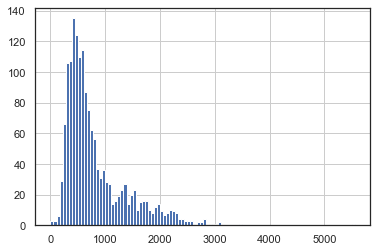

In [269]:
income_geo_df['Total'].hist(bins = 100)
plt.show()

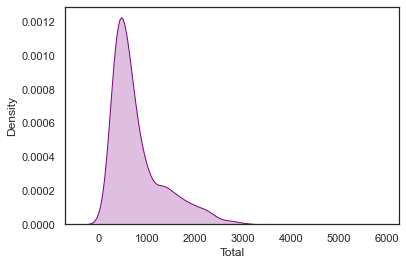

In [149]:
sns.kdeplot(income_geo_df['Total'], shade = True, color = 'purple')
plt.show()

In [268]:
print(f"There are {len(income_geo_df[income_geo_df['Total'] == 0])} census blocks without households in them")

There are 2 census blocks without households in them


We want to check the distribution of all the columns of interest and can do so with a Ridgeplot as well as box plot. 

In [153]:
# want a Ridgeplot of all distributions
# melt DF to prep for visualization
cols = income_geo_df.describe().columns.values
melted_df = pd.melt(income_geo_df[cols[1:]])
melted_df

variable  value
0      Less than $10,000   85.0
1      Less than $10,000   57.0
2      Less than $10,000   33.0
3      Less than $10,000   27.0
4      Less than $10,000   28.0
...                  ...    ...
25291    200,000 or more    0.0
25292    200,000 or more    0.0
25293    200,000 or more   47.0
25294    200,000 or more   14.0
25295    200,000 or more   63.0

[25296 rows x 2 columns]

We see that the distributions for "Less than 10,000" to "45,000 to \\$49,999" are fairly similar and in general there are quite a lot of outliers, especially for "200,000 or more". Making a ridgeplot from '50,000 to $59,999' to '200,000 or more' might be interesting to look at. 

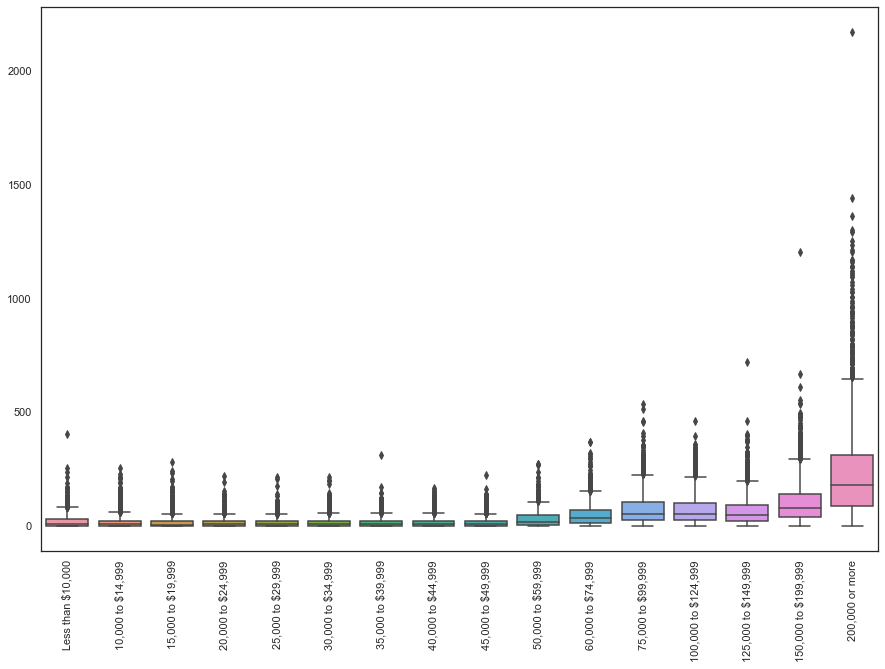

In [173]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = income_geo_df[cols[1:]])
plt.xticks(rotation = 90)
plt.show()

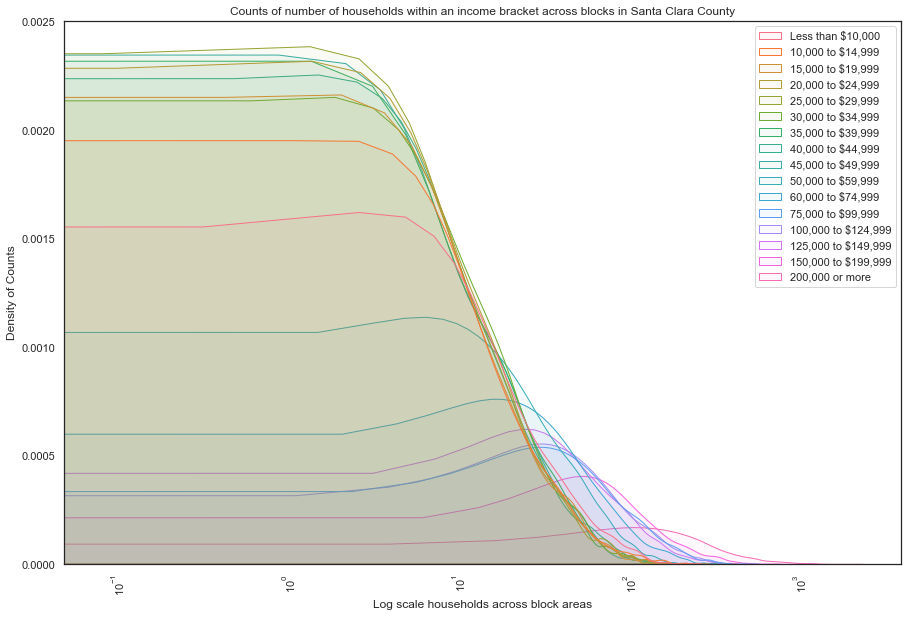

In [259]:
import numpy as np
sns.set_theme(style = "white")
plt.figure(figsize = (15, 10))
sns.kdeplot(data = income_geo_df[cols[1:]], fill = True, alpha = .05, legend = True)
plt.xticks(rotation = 90)
plt.xscale('log')
plt.xlabel("Log scale households across block areas")
plt.ylabel("Density of Counts")
plt.title("Counts of number of households within an income bracket across blocks in Santa Clara County")
plt.show()

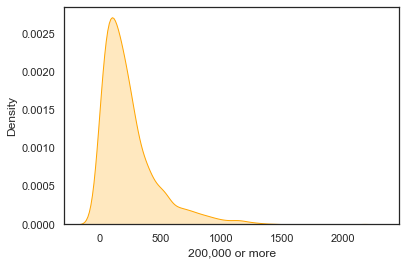

In [176]:
sns.kdeplot(income_geo_df['200,000 or more'], shade = True, color = 'orange')
plt.show()

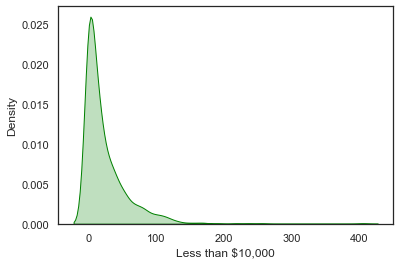

In [178]:
sns.kdeplot(income_geo_df['Less than $10,000'], shade = True, color = 'green')
plt.show()

## Normalize the data
- divide each income column by the total for that census track (block)

In [365]:
household_income_norm = income_geo_df.copy()
for col in cols[1:]:
    household_income_norm[col] = (income_geo_df[col]/income_geo_df['Total']) *100
    
household_income_norm.head()

geoid                                name   Total  \
1  14000US06085500100  Census Tract 5001, Santa Clara, CA  2689.0   
2  14000US06085500200  Census Tract 5002, Santa Clara, CA  1968.0   
3  14000US06085500300  Census Tract 5003, Santa Clara, CA  1540.0   
4  14000US06085500400  Census Tract 5004, Santa Clara, CA  1049.0   
5  14000US06085500500  Census Tract 5005, Santa Clara, CA  2213.0   

   Less than $10,000  10,000 to $14,999  15,000 to $19,999  20,000 to $24,999  \
1           3.161026           5.578282           2.789141           1.338788   
2           2.896341           0.711382           0.558943           0.000000   
3           2.142857           0.000000           0.844156           2.272727   
4           2.573880           0.476644           3.813155           0.476644   
5           1.265251           6.913692           1.717126           4.789878   

   25,000 to $29,999  30,000 to $34,999  35,000 to $39,999  40,000 to $44,999  \
1           4.016363           1.896616           2.008181           2.975084   
2           0.000000           0.914634           0.558943           1.067073   
3           1.363636           2.142857           1.688312           1.233766   
4           2.573880           3.145853           3.145853           1.429933   
5           2.304564           0.768188           2.033439           1.626751   

   45,000 to $49,999  50,000 to $59,999  60,000 to $74,999  75,000 to $99,999  \
1           2.008181           3.570100           2.045370           8.702120   
2           3.252033           2.489837           5.335366          16.006098   
3           2.987013           1.233766           5.000000          19.025974   
4           2.287893           5.243089           7.340324          20.591039   
5           0.677813           0.994126           4.112065           6.687754   

   100,000 to $124,999  125,000 to $149,999  150,000 to $199,999  \
1             6.805504            12.049089            13.982893   
2             8.485772            14.430894            15.548780   
3             8.831169             5.779221            22.207792   
4             6.863680             8.579600            10.772164   
5            14.414822             9.805694            12.697695   

   200,000 or more                                           geometry  
1        27.073261  MULTIPOLYGON (((-121.90463 37.36078, -121.9044...  
2        27.743902  MULTIPOLYGON (((-121.91125 37.35418, -121.9108...  
3        23.246753  MULTIPOLYGON (((-121.92189 37.34604, -121.9218...  
4        20.686368  MULTIPOLYGON (((-121.93034 37.33913, -121.9303...  
5        29.191143  MULTIPOLYGON (((-121.94078 37.32835, -121.9407...

### Melt the dataframes 
break up the incomes per boxplot distribution spead to get a better look at density

In [366]:
# Get higher income distribution df made
melted_df_higher = pd.melt(household_income_norm[cols[-7:]])
# Get Lower income distribtion df made
melted_df_lower = pd.melt(household_income_norm[cols[1:10]])

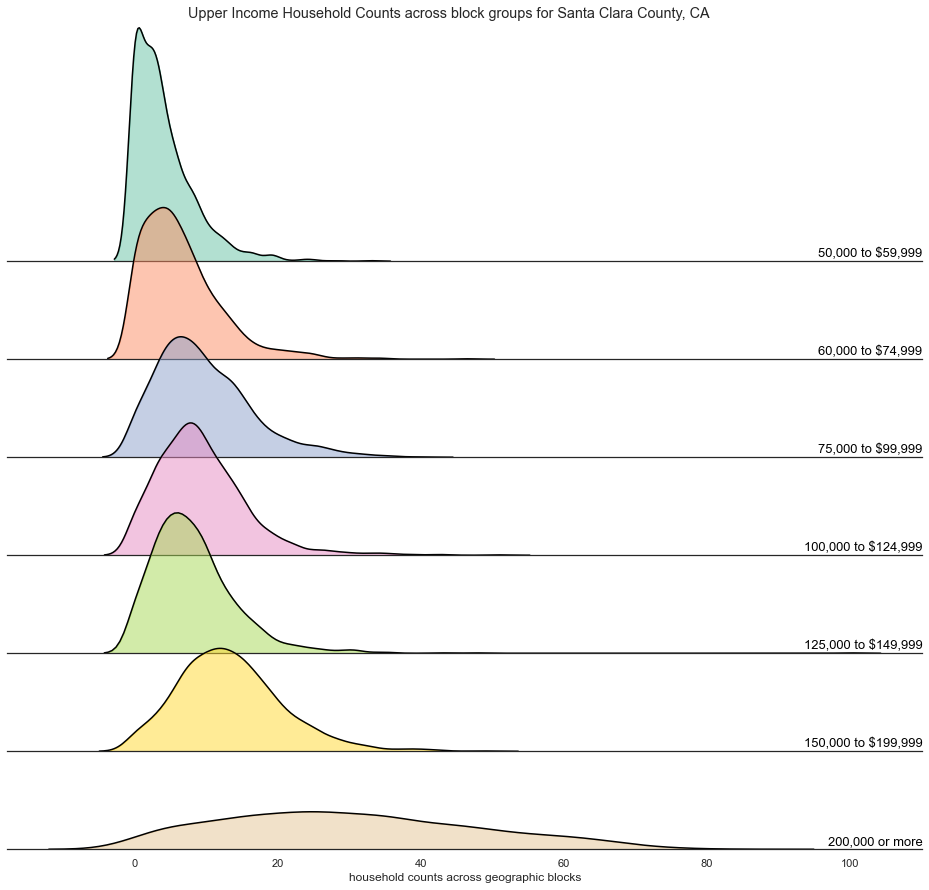

In [367]:
def ridgeplot(df, title, title_ht):
    """
    df     : dataframe, the data to use
    title  : string, the title of the plot
    return : a ridgeplot
    
    """
    sns.set_theme(style = "white", rc = {"axes.facecolor": (0,0,0,0)}) # transparent background

    palette = sns.color_palette("Set2", 12)

    g = sns.FacetGrid(df,
                      palette = palette,
                      hue = 'variable',
                      row = 'variable', 
                      aspect = 7.5, 
                      height = 1.8)

    g.map_dataframe(sns.kdeplot, x = 'value', fill = True, alpha = .5)
    g.map_dataframe(sns.kdeplot, x = 'value', color = 'black')

    # Create Labels

    def create_label(x, color, label):
        ax = plt.gca()
        ax.text(1, .02, label, color = 'black', fontsize = 13,
               ha = 'right', transform = ax.transAxes)

    g.map(create_label, 'variable')

    g.fig.subplots_adjust(hspace = -.6)

    g.set_titles("")
    g.set(yticks =[], xlabel = 'household counts across geographic blocks')
    g.despine(left = True)

    plt.suptitle(title, y = title_ht, x = .5)
    plt.show()
    
ridgeplot(melted_df_higher, 
          "Upper Income Household Counts across block groups for Santa Clara County, CA",
         .98)

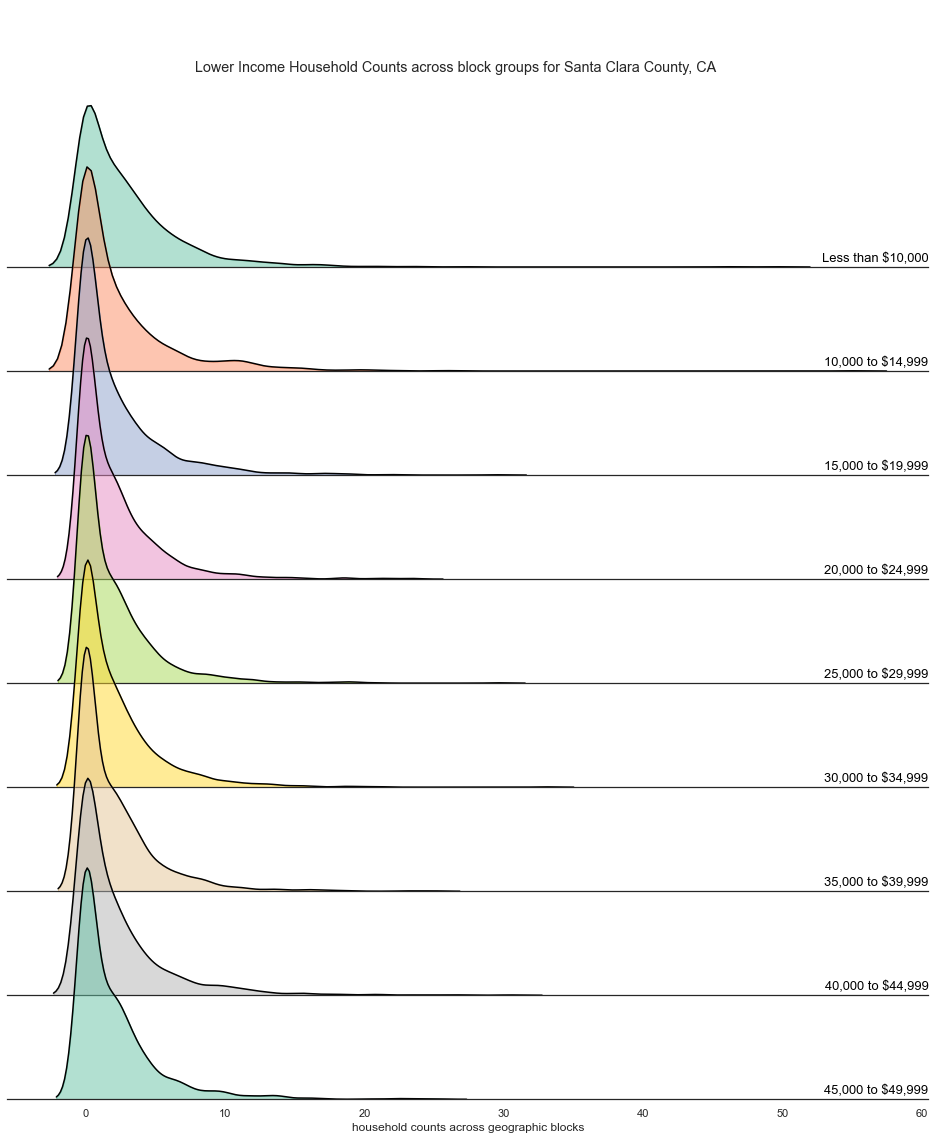

In [287]:
ridgeplot(melted_df_lower, 
          "Lower Income Household Counts across block groups for Santa Clara County, CA", 
          .93)

## Create Maps of household income across blocks
- Packages
    - PySAL mapclassify
        - natural_breaks
        - equal_interval
        - quantiles
    - Geopandas

- Choose a column to visualize, though in a dashboard, we can choose a different income column to visualize using a dropdown menu. 

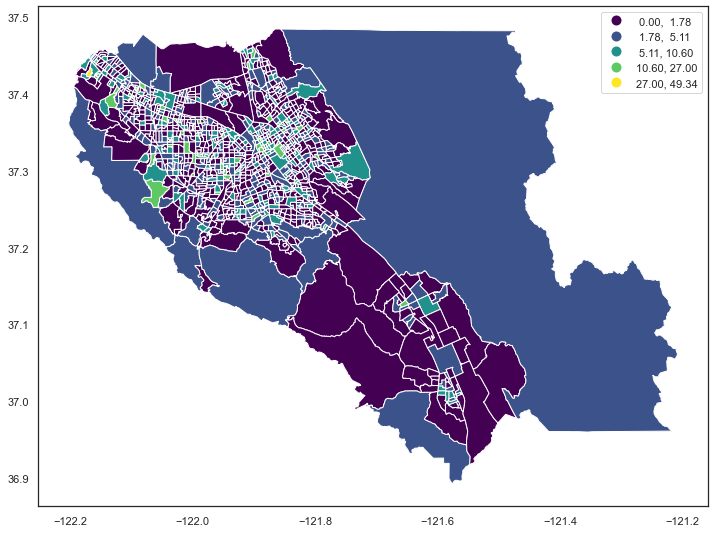

In [368]:
sns.set_theme(style = 'white')
household_income_norm.plot(figsize=(12, 10),
                           column = "Less than $10,000", 
                           legend = True, 
                           scheme = "NaturalBreaks")
plt.show()

### Interpretation

below we can see that there is a small concentrated population of households that live in the center of the county and then in the large county out to the right. This area to the right is rural land, and we tend to think everything is spread out in rural country so access to farmer's market will require transportation likely by personal vehicle. 

- we may want to check income quantiles in the county of Santa Clara to combine columns, maybe into 25th, 50th and 75th and >90th income columns for easier comparison

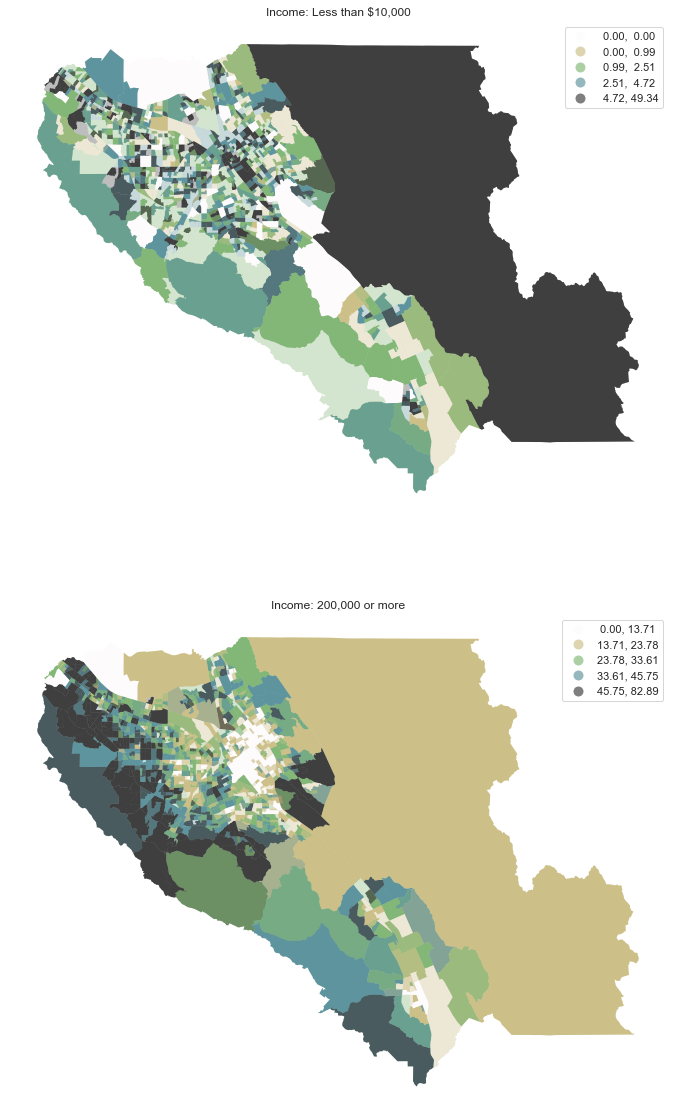

In [369]:
sns.set_theme(style = 'white')

fig, ax = plt.subplots(2, 1, figsize = (20, 20))

# Subplots
ax1, ax2 = ax

# Low Income households
household_income_norm.plot(column = "Less than $10,000", 
                           cmap = "gist_earth_r",
                           k = 5,
                           edgecolor = 'white',
                           linewidth = 0,
                           alpha = 0.5,
                           ax = ax1,
                           legend = True, 
                           scheme = "quantiles")

ax1.axis('off')
ax1.set_title("Income: Less than $10,000")

# Higher Income households
household_income_norm.plot(column = "200,000 or more", 
                           cmap = "gist_earth_r",
                           k = 5,
                           edgecolor = 'white',
                           linewidth = 0,
                           alpha = 0.5,
                           ax = ax2,
                           legend = True, 
                           scheme = "quantiles")

ax2.axis('off')
ax2.set_title("Income: 200,000 or more")


plt.show()

## Create New Income Features

We are going to create new features of the data by combining column data followed by normalizing. 
Based on California data 
- 25th Percentile	\\$20,000.00 
- 75th Percentile	\\$73,483.00 
- 90th Percentile	\\$126,001.00

so we will combine:
- 'Less than \\$10,000', '10,000 to \\$14,999', '15,000 to \\$19,999' into 'Less than \\$20,000'
- '20,000 to \\$24,999' to '50,000 to \\$59,999' into 'Between \\$20,000 and \\$59,999'
- '60,000 to \\$74,999' to '100,000 to \\$124,999' into 'Between \\$60,000 and $124,999'
- '125,000 to \\$149,999' to '200,000 or more' into 'Greater than 125,000'

In [371]:
income_geo_df['Less than $20,000'] = income_geo_df[cols[1:4]].sum(axis = 1)
income_geo_df['Between 20,000 and $59,999'] = income_geo_df[cols[4:11]].sum(axis = 1)
income_geo_df['Between 60,000 and $124,999'] = income_geo_df[cols[11:14]].sum(axis = 1)
income_geo_df['Greater than $125,000'] = income_geo_df[cols[14:]].sum(axis = 1)

In [372]:
new_feat = ['Less than $20,000','Between 20,000 and $59,999',
            'Between 60,000 and $124,999','Greater than $125,000']
household_income_norm2 = income_geo_df.copy()
for col in new_feat:
    household_income_norm2[col] = (income_geo_df[col]/income_geo_df['Total']) *100
    
household_income_norm2.head()

geoid                                name   Total  \
1  14000US06085500100  Census Tract 5001, Santa Clara, CA  2689.0   
2  14000US06085500200  Census Tract 5002, Santa Clara, CA  1968.0   
3  14000US06085500300  Census Tract 5003, Santa Clara, CA  1540.0   
4  14000US06085500400  Census Tract 5004, Santa Clara, CA  1049.0   
5  14000US06085500500  Census Tract 5005, Santa Clara, CA  2213.0   

   Less than $10,000  10,000 to $14,999  15,000 to $19,999  20,000 to $24,999  \
1               85.0              150.0               75.0               36.0   
2               57.0               14.0               11.0                0.0   
3               33.0                0.0               13.0               35.0   
4               27.0                5.0               40.0                5.0   
5               28.0              153.0               38.0              106.0   

   25,000 to $29,999  30,000 to $34,999  35,000 to $39,999  ...  \
1              108.0               51.0               54.0  ...   
2                0.0               18.0               11.0  ...   
3               21.0               33.0               26.0  ...   
4               27.0               33.0               33.0  ...   
5               51.0               17.0               45.0  ...   

   75,000 to $99,999  100,000 to $124,999  125,000 to $149,999  \
1              234.0                183.0                324.0   
2              315.0                167.0                284.0   
3              293.0                136.0                 89.0   
4              216.0                 72.0                 90.0   
5              148.0                319.0                217.0   

   150,000 to $199,999  200,000 or more  \
1                376.0            728.0   
2                306.0            546.0   
3                342.0            358.0   
4                113.0            217.0   
5                281.0            646.0   

                                            geometry  Less than $20,000  \
1  MULTIPOLYGON (((-121.90463 37.36078, -121.9044...          11.528449   
2  MULTIPOLYGON (((-121.91125 37.35418, -121.9108...           4.166667   
3  MULTIPOLYGON (((-121.92189 37.34604, -121.9218...           2.987013   
4  MULTIPOLYGON (((-121.93034 37.33913, -121.9303...           6.863680   
5  MULTIPOLYGON (((-121.94078 37.32835, -121.9407...           9.896069   

   Between 20,000 and $59,999  Between 60,000 and $124,999  \
1                   17.813313                    17.552994   
2                    8.282520                    29.827236   
3                   12.922078                    32.857143   
4                   18.303146                    34.795043   
5                   13.194758                    25.214641   

  Greater than $125,000  
1             53.105244  
2             57.723577  
3             51.233766  
4             40.038132  
5             51.694532  

[5 rows x 24 columns]

## Visualize New Features
- kdeplot: we can see how separated the household incomes are now over census county blocks and the drift that happens. When a household income increases, those households move away from blocks where incomes are lower. 

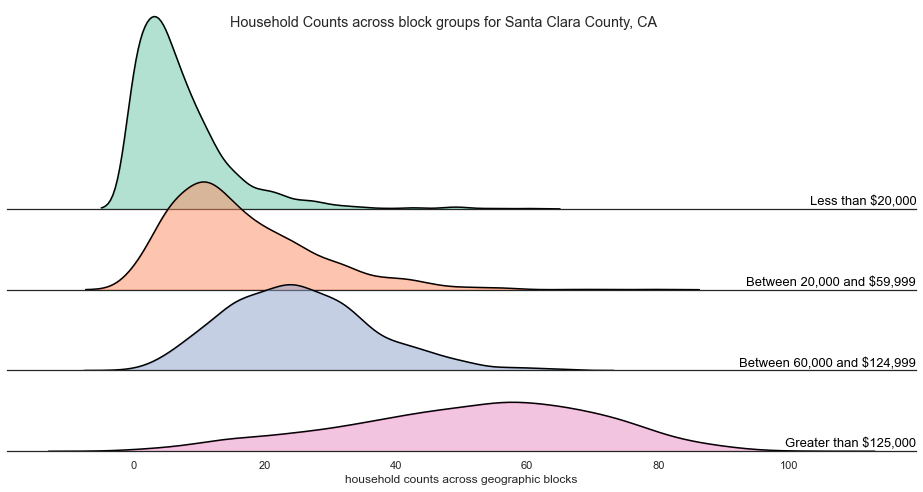

In [373]:
# new Kdeplots
kdeplot_df = household_income_norm2[new_feat]
kdeplot_df_melt = pd.melt(kdeplot_df)
ridgeplot(kdeplot_df_melt, 
          "Household Counts across block groups for Santa Clara County, CA", 
          .93)

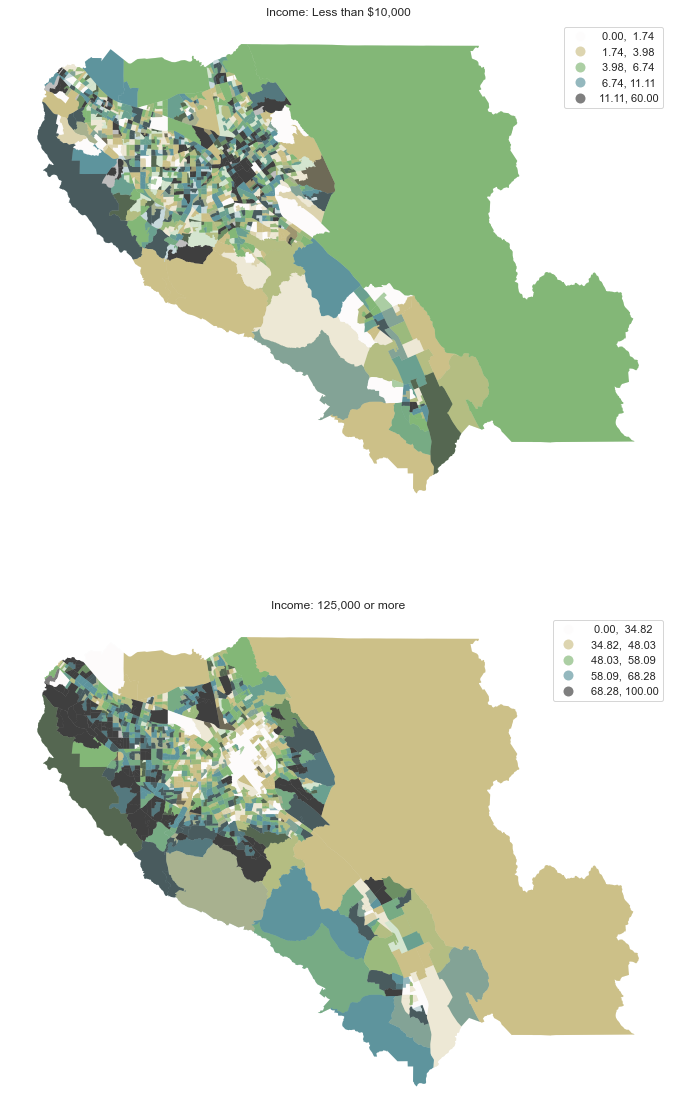

In [375]:
sns.set_theme(style = 'white')

fig, ax = plt.subplots(2, 1, figsize = (20, 20))

# Subplots
ax1, ax2 = ax

# Low Income households
household_income_norm2.plot(column = 'Less than $20,000', 
                           cmap = "gist_earth_r",
                           k = 5,
                           edgecolor = 'white',
                           linewidth = 0,
                           alpha = 0.5,
                           ax = ax1,
                           legend = True, 
                           scheme = "quantiles")

ax1.axis('off')
ax1.set_title("Income: Less than $10,000")

# Higher Income households
household_income_norm2.plot(column = 'Greater than $125,000', 
                           cmap = "gist_earth_r",
                           k = 5,
                           edgecolor = 'white',
                           linewidth = 0,
                           alpha = 0.5,
                           ax = ax2,
                           legend = True, 
                           scheme = "quantiles")

ax2.axis('off')
ax2.set_title("Income: 125,000 or more")


plt.show()

Let's get more explicit with thresholding the data

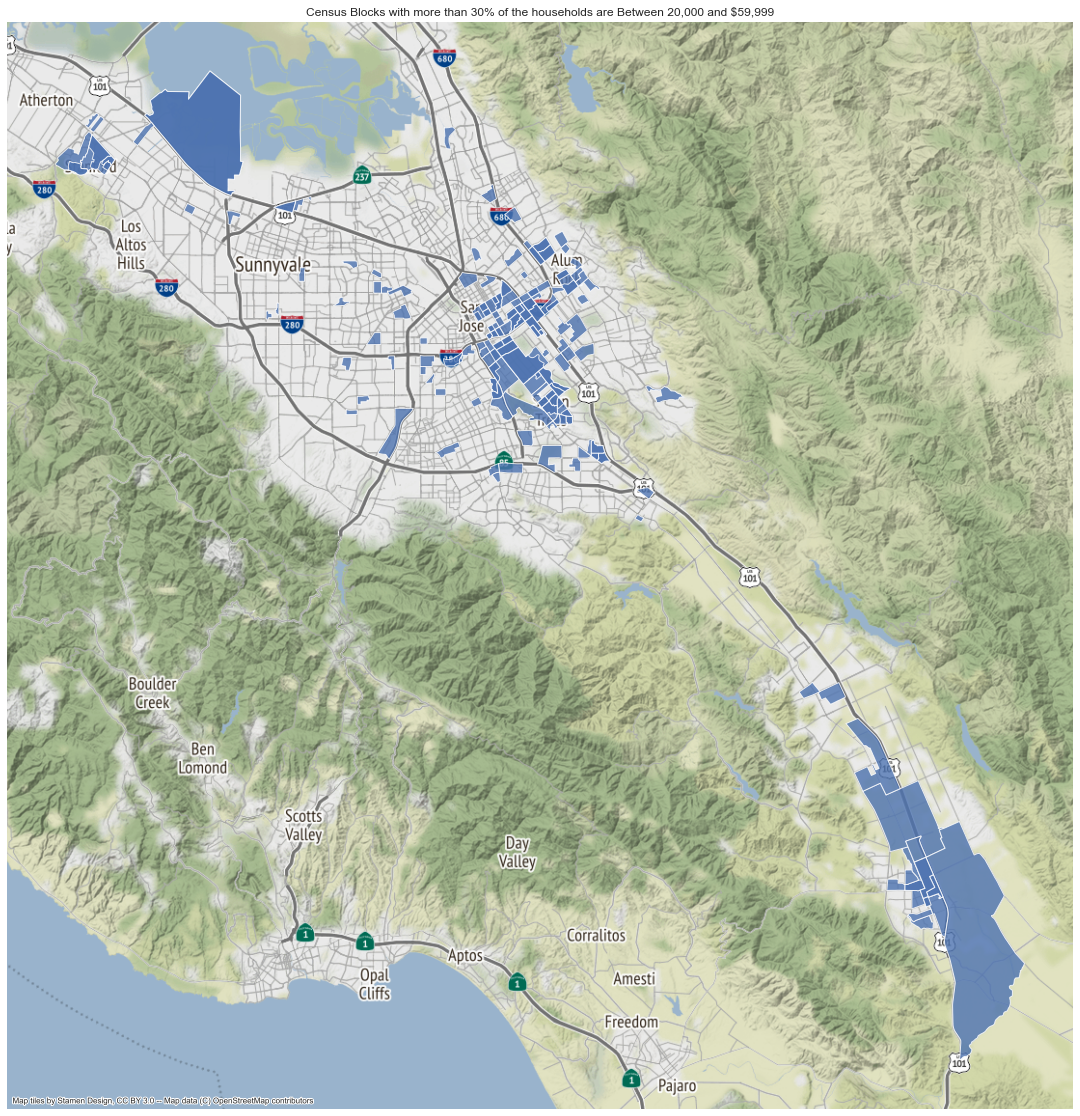

In [386]:
threshold = 30
col_name = 'Between 20,000 and $59,999'

norm_web_merc = household_income_norm2.to_crs(epsg = 3857)

fig, ax = plt.subplots(figsize = (20, 20))

norm_web_merc[norm_web_merc[col_name] > threshold].plot(ax = ax, alpha = 0.8)

ax.axis('off')
ax.set_title(f"Census Blocks with more than {threshold}% of the households are {col_name}")
ctx.add_basemap(ax)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de7d88cb-bbe8-44a7-b0b0-d8de7a012e2c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>